In [ ]:
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import layers
from keras.utils import to_categorical
from keras import optimizers
from keras.applications.imagenet_utils import preprocess_input

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

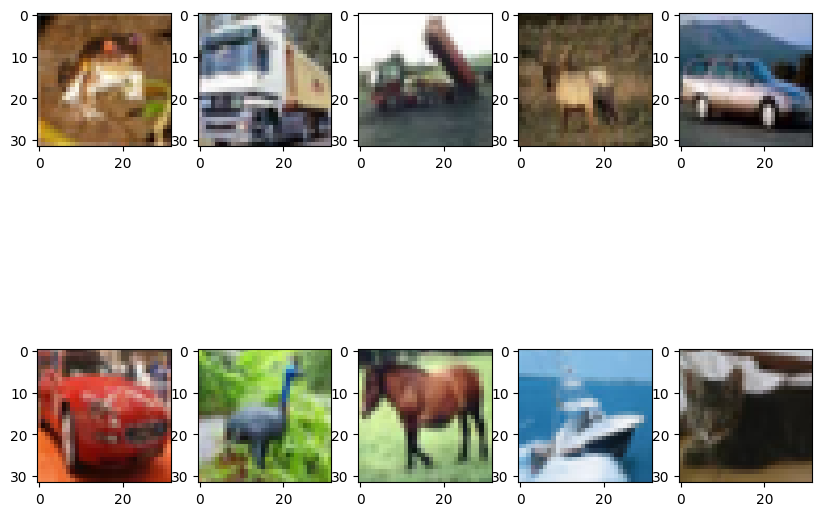

In [ ]:
plt.figure(figsize=(10,8))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_train[i])

plt.show()

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

## data augmentation

In [ ]:
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:10]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 64)          3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
batch_size = 32
train_generator  = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator  = test_datagen.flow(x_test, y_test, batch_size=batch_size)


In [ ]:
train_datagen.fit(x_train)
test_datagen.fit (x_test)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=len(x_train)/batch_size,
      epochs=10,
      validation_data=test_generator,
      validation_steps=50)

Epoch 1/10
1562/1562 [==============================] - 59s 29ms/step - loss: 1.7111 - accuracy: 0.3612 - val_loss: 1.3645 - val_accuracy: 0.5131
Epoch 2/10
1562/1562 [==============================] - 43s 28ms/step - loss: 1.3791 - accuracy: 0.5015 - val_loss: 1.1493 - val_accuracy: 0.5888
Epoch 3/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.2314 - accuracy: 0.5624 - val_loss: 1.0678 - val_accuracy: 0.6194
Epoch 4/10
1562/1562 [==============================] - 43s 28ms/step - loss: 1.1408 - accuracy: 0.5944 - val_loss: 1.0474 - val_accuracy: 0.6319
Epoch 5/10
1562/1562 [==============================] - 42s 27ms/step - loss: 1.0801 - accuracy: 0.6178 - val_loss: 0.9215 - val_accuracy: 0.6775
Epoch 6/10
1562/1562 [==============================] - 44s 28ms/step - loss: 1.0282 - accuracy: 0.6383 - val_loss: 0.8807 - val_accuracy: 0.6881
Epoch 7/10
1562/1562 [==============================] - 43s 28ms/step - loss: 0.9857 - accuracy: 0.6519 - val_loss: 0.8194 -

In [ ]:
test_loss, test_acc = model.evaluate(test_generator)

313/313 [==============================] - 2s 6ms/step - loss: 0.7702 - accuracy: 0.7324


In [ ]:
test_acc

0.7324000000953674

## TL

In [ ]:
from keras.applications import VGG16

conv_VGG = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
conv_VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
model = Sequential()
model.add(conv_VGG)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 14,781,642
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_VGG.trainable = False

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 14,781,642
Trainable params: 66,954
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator(
      preprocessing_function=preprocess_input,
      rotation_range=20, 
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.1,
      zoom_range=0.1,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
batch_size = 32
train_generator  = train_datagen.flow(x_train, y_train, batch_size=batch_size)
test_generator  = test_datagen.flow(x_test, y_test, batch_size=batch_size)

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=len(x_train)/batch_size,
      epochs=10,
      validation_data= test_generator)

Epoch 1/10


<ipython-input-31-cddd8154943f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


1562/1562 [==============================] - 52s 32ms/step - loss: 2.1252 - accuracy: 0.4386 - val_loss: 1.2174 - val_accuracy: 0.5815
Epoch 2/10
1562/1562 [==============================] - 50s 32ms/step - loss: 1.3231 - accuracy: 0.5391 - val_loss: 1.0995 - val_accuracy: 0.6165
Epoch 3/10
1562/1562 [==============================] - 49s 32ms/step - loss: 1.2422 - accuracy: 0.5695 - val_loss: 1.0739 - val_accuracy: 0.6361
Epoch 4/10
1562/1562 [==============================] - 48s 31ms/step - loss: 1.2133 - accuracy: 0.5800 - val_loss: 1.0388 - val_accuracy: 0.6470
Epoch 5/10
1562/1562 [==============================] - 49s 32ms/step - loss: 1.1819 - accuracy: 0.5906 - val_loss: 1.0717 - val_accuracy: 0.6361
Epoch 6/10
1562/1562 [==============================] - 49s 31ms/step - loss: 1.1659 - accuracy: 0.5979 - val_loss: 1.0491 - val_accuracy: 0.6462
Epoch 7/10
1562/1562 [==============================] - 48s 31ms/step - loss: 1.1528 - accuracy: 0.6011 - val_loss: 1.0475 - val_accura